In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
full = pd.read_csv('full.csv', index_col=0, header=[0], parse_dates=True)
full.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN,NaN


In [91]:
def log_series(series): # for monthly
    series = series.apply(lambda x: np.log(x))
    return series - series.shift(12)

def yoy_growth(series): # for monthly
    return series.pct_change(periods=12)

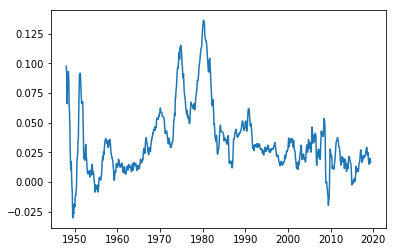

In [92]:
plt.plot(log_series(full["CPIAUCSL"]))

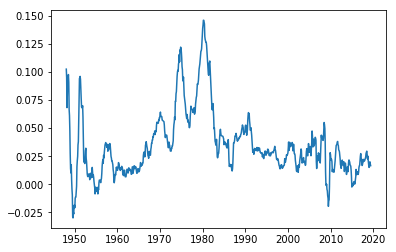

In [93]:
plt.plot(yoy_growth(full["CPIAUCSL"]))

In [40]:
full.loc["2000-01-01"]
# to see which ones we need to log

CPIAUCSL              169.30000
FEDFUNDS                5.45000
HOUST                1636.00000
INDPRO                 94.17580
INTDSRUSM193N           5.00000
ISRATIO                 1.38000
M2SL                 4656.30000
MTSDS133FMS         62152.00000
PAYEMS             131020.00000
PCE                  6535.30000
T10Y2YM                 0.22000
T10YFFM                 1.21000
UMCSENT               112.00000
UNRATE                  4.00000
USSLIND                 1.61000
A191RL1Q225SBEA         1.50000
A191RO1Q156NBEA         4.20000
GFDEGDQ188S            57.71743
GPDI                 1950.65000
PCEC                 6613.59700
AAA                     7.78000
BAA                     8.33000
CIVPART                67.30000
GS20                    6.86000
GS3                     6.49000
IRLTLT01USM156N         6.66000
M1SL                 1122.20000
MCOILWTICO             27.26000
PPIACO                128.30000
TCU                    82.05160
TOTALSA                18.63500
PMI     

In [ ]:
# drop GDPC1 as absolute level
full.drop(columns="GDPC1", inplace=True)

In [69]:
need_log = ["CPIAUCSL", "HOUST", "INDPRO", "ISRATIO", "M2SL", "MTSDS133FMS", 
               "PAYEMS", "PCE", "UMCSENT", "GFDEGDQ188S", "GPDI", "PCEC", "CIVPART", "M1SL",
               "MCOILWTICO", "PPIACO", "TCU", "TOTALSA", "PMI"]

all_cols = list(full.columns)

not_logged = []

for series in all_cols:
    if series not in need_log:
        not_logged.append(series)
        
not_logged

['FEDFUNDS',
 'INTDSRUSM193N',
 'T10Y2YM',
 'T10YFFM',
 'UNRATE',
 'USSLIND',
 'A191RL1Q225SBEA',
 'A191RO1Q156NBEA',
 'AAA',
 'BAA',
 'GS20',
 'GS3',
 'IRLTLT01USM156N']

In [70]:
logged = full.copy()

for series in need_log:
    logged[series] = log_series(logged[series])
    
logged.loc["1980-01-01":"1981-01-01"]

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1980-01-01,0.129875,13.82,-0.195164,0.008605,12.00,NaN,0.077887,NaN,0.022183,0.121975,...,0.006270,10.65,10.88,10.80,0.073112,NaN,0.143643,-0.018680,-0.042176,-0.236047
1980-02-01,0.132447,14.13,-0.118606,0.003276,12.52,NaN,0.081371,NaN,0.020319,0.114190,...,0.003130,12.21,12.84,12.41,0.080577,NaN,0.148604,-0.023356,-0.143267,-0.147870
1980-03-01,0.136210,17.19,-0.567634,-0.003143,13.00,NaN,0.077612,NaN,0.016790,0.109388,...,-0.001569,12.49,14.05,12.75,0.069011,NaN,0.143541,-0.029145,-0.234915,-0.280200
1980-04-01,0.136184,17.61,-0.508730,-0.012560,13.00,NaN,0.068960,NaN,0.015888,0.097058,...,0.004713,11.42,12.02,11.47,0.042039,NaN,0.132556,-0.037983,-0.344673,-0.407246
1980-05-01,0.134756,10.98,-0.704944,-0.045172,12.94,NaN,0.069900,NaN,0.007003,0.086771,...,0.009434,10.44,9.44,10.18,0.040302,NaN,0.130462,-0.070085,-0.409928,-0.615369
1980-06-01,0.133358,9.47,-0.469690,-0.057534,11.40,NaN,0.071977,NaN,-0.000078,0.086927,...,0.003145,9.89,8.91,9.78,0.041186,NaN,0.128551,-0.082030,-0.198554,-0.553468
1980-07-01,0.123550,9.03,-0.327085,-0.063926,10.87,NaN,0.074322,NaN,-0.004188,0.096679,...,0.003140,10.32,9.27,10.25,0.043575,NaN,0.131161,-0.088125,-0.190518,-0.382343
1980-08-01,0.121245,9.61,-0.213628,-0.053681,10.00,NaN,0.076431,NaN,-0.002228,0.087764,...,0.001571,11.07,10.63,11.10,0.052454,NaN,0.139325,-0.077724,-0.251534,-0.084260
1980-09-01,0.120170,10.87,-0.219466,-0.038701,10.17,NaN,0.079233,NaN,-0.001263,0.085924,...,-0.003140,11.47,11.57,11.51,0.065066,NaN,0.125309,-0.062734,-0.269837,0.010030
1980-10-01,0.118964,12.81,-0.098707,-0.031632,11.00,NaN,0.081748,NaN,0.000099,0.101570,...,0.000000,11.75,12.01,11.75,0.071441,NaN,0.122509,-0.055795,-0.138862,0.124563


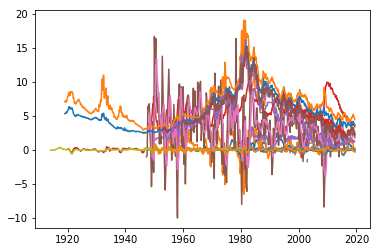

In [71]:
plt.plot(logged)

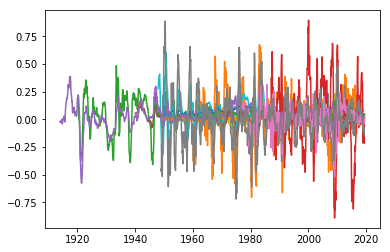

In [81]:
small_logged = pd.DataFrame()
greater = []

for series in logged:
    col = logged[series]
    for data in col:
        if data > 2:
            greater.append(series)
            break
                        
for series in logged:
    if series not in greater:
        small_logged[series] = logged[series]
        
plt.plot(small_logged)

In [82]:
small_logged.to_csv("small_logged.csv")

In [13]:
logged.tail(8)
# data cuts off in Jan 2019

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
2018-11-01,5.532440,2.20,7.091742,4.705076,NaN,0.307485,9.565536,NaN,11.918711,9.563733,...,4.141546,3.27,2.91,3.12,8.216115,4.042349,5.309752,4.376669,2.887033,4.074142
2018-12-01,5.532294,2.27,7.040536,4.705482,NaN,0.329304,9.572752,NaN,11.920222,9.557993,...,4.144721,2.98,2.67,2.83,8.229858,3.902377,5.303305,4.375285,2.890538,3.994524
2019-01-01,5.532096,2.40,7.163172,4.701305,NaN,0.329304,9.577605,9.068892,11.922296,9.561356,...,4.146304,2.89,2.52,2.71,8.227990,3.939249,5.293807,4.369506,2.846130,4.036009
2019-02-01,5.533836,2.40,7.046647,4.695659,NaN,0.329304,9.578041,NaN,11.922668,9.559708,...,4.146304,2.87,2.48,2.68,8.233822,4.006424,5.294309,4.362700,2.826544,3.992681
2019-03-01,5.537917,2.41,7.089243,4.696824,NaN,0.322083,9.579702,NaN,11.923683,9.570055,...,4.143135,2.80,2.37,2.57,8.223010,4.063026,5.303802,4.361858,2.882788,4.012773
2019-04-01,5.541099,2.42,7.155396,4.692867,NaN,0.329304,9.582897,11.984834,11.925115,9.575587,...,4.139955,2.76,2.31,2.53,8.238273,4.156693,5.308763,4.355393,2.828378,3.966511
2019-05-01,5.541871,2.39,7.145984,4.696513,NaN,NaN,9.589592,NaN,11.925591,9.579722,...,4.139955,2.63,2.16,2.40,8.240385,4.108083,5.305789,4.357817,2.886698,3.953165
2019-06-01,5.542459,2.38,NaN,NaN,NaN,NaN,9.599344,NaN,11.927073,NaN,...,4.141546,2.36,1.78,2.07,8.251064,4.001132,5.299816,4.355703,2.881163,3.945458


In [15]:
logged = logged.drop(logged.tail(5).index)
logged.tail(8)

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
2018-06-01,5.525987,1.82,7.073270,4.683711,NaN,0.292670,9.554476,NaN,11.911749,9.542589,...,4.141546,2.98,2.65,2.91,8.203851,4.217594,5.319100,4.363775,2.874129,4.094345
2018-07-01,5.527829,1.91,7.076654,4.688150,NaN,0.300105,9.557378,NaN,11.912942,9.547412,...,4.141546,2.94,2.70,2.89,8.209825,4.262398,5.319590,4.366652,2.845491,4.067316
2018-08-01,5.528949,1.91,7.153834,4.696149,NaN,0.300105,9.560335,NaN,11.914831,9.551274,...,4.138361,2.97,2.71,2.89,8.210614,4.220390,5.315174,4.372999,2.844735,4.107590
2018-09-01,5.529469,1.95,7.119636,4.697521,NaN,0.300105,9.562770,11.687853,11.915553,9.552539,...,4.138361,3.08,2.84,3.00,8.217061,4.251776,5.316157,4.372655,2.888481,4.085976
2018-10-01,5.532575,2.19,7.099202,4.699721,NaN,0.307485,9.564274,NaN,11.917403,9.558805,...,4.141546,3.27,2.94,3.15,8.221667,4.259153,5.321057,4.373098,2.896022,4.051785
2018-11-01,5.532440,2.20,7.091742,4.705076,NaN,0.307485,9.565536,NaN,11.918711,9.563733,...,4.141546,3.27,2.91,3.12,8.216115,4.042349,5.309752,4.376669,2.887033,4.074142
2018-12-01,5.532294,2.27,7.040536,4.705482,NaN,0.329304,9.572752,NaN,11.920222,9.557993,...,4.144721,2.98,2.67,2.83,8.229858,3.902377,5.303305,4.375285,2.890538,3.994524
2019-01-01,5.532096,2.40,7.163172,4.701305,NaN,0.329304,9.577605,9.068892,11.922296,9.561356,...,4.146304,2.89,2.52,2.71,8.227990,3.939249,5.293807,4.369506,2.846130,4.036009


In [16]:
logged.to_csv("logged.csv")